In [87]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

# linkCollab = "/content/drive/MyDrive/Colab Notebooks/dados/result.csv"

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [3]:
# 1 - Importar libs e dataset

import pandas as pd
import numpy as np

link = "C:/Users/CarlosViniMSouza/Documents/Projects/data-mining-ifam/database/result.csv"
link2 = "/workspaces/trabalho-final/database/Financial-Data.csv"

dataset = pd.read_csv(link2)

In [4]:
# 2 - Destinar features e coluna-alvo

featureNames = ['risk_score', 'amount_requested', 'has_debt', 'income']

X = pd.DataFrame(dataset, columns=featureNames)
y = np.array(dataset['e_signed'])

In [5]:
# 3 - Dividindo os dados de treino e teste

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [6]:
# 4 - Checando proporções de treino e teste

print(f"Shape de treino: {X_train.shape}")

print(f"Shape de teste: {X_test.shape}")

Shape de treino: (12535, 4)
Shape de teste: (5373, 4)


In [7]:
# 3 - Definindo classificador (Com valores padrão)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [8]:
# 4 - TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.999680893498205

In [9]:
# 5 - TEST

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.9998138842359948

In [10]:
# 6 - Resultado

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print(score)

0.9998138842359948


## Vamos testar alguns parâmetros do tipo **critério**:

1. `gini (valor padrão)`
2. `entropy`
3. `log_loss`

## E três parâmetros especifícos:

1. `max_depth`
2. `min_samples_split`
3. `splitter`

In [11]:
model = DecisionTreeClassifier(
    criterion='entropy', 
    splitter="best", 
    max_depth=1000, 
    min_samples_split=10
)

In [12]:
# TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8804946150777823

In [13]:
# TESTE

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.8710217755443886

In [14]:
# Resultado

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print(score)

0.8710217755443886


In [15]:
model = DecisionTreeClassifier(
    criterion='log_loss', 
    splitter="best",
    max_depth=1000, 
    min_samples_split=10
)

In [16]:
# TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8808934982050259

In [17]:
# TESTE

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.8708356597803834

In [18]:
# Resultados

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print(score)

0.8708356597803834


In [21]:
import seaborn as sns

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2492
           1       0.90      0.85      0.88      2881

    accuracy                           0.87      5373
   macro avg       0.87      0.87      0.87      5373
weighted avg       0.87      0.87      0.87      5373



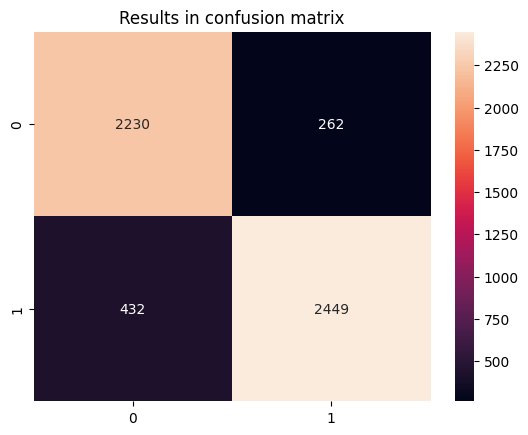

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

confMatrix = confusion_matrix(y_test, predictions)

sns \
    .heatmap(confMatrix, annot=True, fmt='d') \
    .set_title('Results in confusion matrix')

print(classification_report(y_test, predictions))